<a href="https://www.kaggle.com/code/dannasalazar11/tam-principios-de-probabilidad?scriptVersionId=163356056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Ejercicio 1 - principio de probabilidad

$p(A|B) = \frac{p(B|A)p(A)}{P(B)}$

Este ejercicio consiste en mostrar todas las posibles probabilidades marginales y conjuntas dados que se conocen la lista de eventos y los priors.

In [1]:
import numpy as np

def mybayes(list_event, priors):
    """
    Estimación posterior desde Bayes 
    """
    
    # Número de cajas
    nB = len(list_event)
    
    # Eventos de cada caja
    even_ = np.zeros(nB)
    
    # Encontrar todas las frutas distintas
    frutas = set()
    for sublista in list_event:
        frutas.update(sublista)
    frutas = list(frutas)
    
    # Calcular probabilidades marginales de cada fruta
    marginales = np.zeros(len(frutas))
    for i, fruta in enumerate(frutas):
        marginales[i] = sum([priors[b] * list_event[b].count(fruta) / len(list_event[b]) for b in range(nB)])
        print(f'P(F={fruta}) = {marginales[i]:.4f}')
    
    # Calcular las probabilidades condicionales
    for b in range(nB):
        # Total de frutas en la caja b
        num_total = len(list_event[b])
        
        for fruta in np.unique(list_event[b]):
            index_fruta = frutas.index(fruta)
            num_veces_f = list_event[b].count(fruta)  # Cuántas veces la fruta fruta está en la caja b-ésima 
                
            verosim = num_veces_f / num_total 
            posterior = (verosim * priors[b]) / marginales[index_fruta]
            print(f'P(B = {chr(65+b)} | F={fruta}) = {posterior:.4f}')

In [2]:
list_event = [[1,1,0,0,0,0,0,0], [1,1,1,0,2,2], [2,1,0]]
priors = np.array([0.3, 0.6, 0.1])

mybayes(list_event, priors)

P(F=0) = 0.3583
P(F=1) = 0.4083
P(F=2) = 0.2333
P(B = A | F=0) = 0.6279
P(B = A | F=1) = 0.1837
P(B = B | F=0) = 0.2791
P(B = B | F=1) = 0.7347
P(B = B | F=2) = 0.8571
P(B = C | F=0) = 0.0930
P(B = C | F=1) = 0.0816
P(B = C | F=2) = 0.1429


****

**Ejercicio 2: distribuciones Gaussianas**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de datos sintéticos
m1 = 0.1
v1 = 0.8 
n1 = 100
x1 =np.random.normal(m1,v1, n1)

m2 = 1.5
v2 = 0.6
n2 = 80
x2 =np.random.normal(m2,v2,n2)

m_y1 = 0.5
v_y1 = 0.15
n_y1 = n1
y1 = np.random.normal(m_y1,v_y1, n_y1)

m_y2 = 1.5
v_y2 = 0.15
n_y2 = n2
y2 = np.random.normal(m_y2,v_y2, n_y2)


In [4]:
### P(Y)

ind_y1 = [i for i,valor in enumerate(y1) if valor<1]
P_y1 = len(ind_y1)

ind_y2 = [i for i,valor in enumerate(y2) if valor>=1]
P_y2 = len(ind_y2)

### P(X)

# primero dividimos en 9 subintervalos encontrando la distancia de cada uno

X = np.concatenate((x1,x2))
dist = np.abs(max(X)-min(X))/9
P_X = np.zeros(9)

for i in range(len(P_X)):
    P_X[i] = sum(1 for elemento in X if min(X) + i * dist < elemento < min(X) + (i + 1) * dist) / len(X)
### P(X|Y=1)

P_XY1 = np.zeros(9)

for i in range(len(P_XY1)):
    P_XY1[i] =  sum(1 for elemento in x1 if min(x1) + i*dist < elemento < min(x1)+(i+1)*dist)/len(x1)

In [5]:
# Función que devuele la distribución normal/gaussiana
def dist_normal(mu, varianza, x):
    exponente = -((x - mu) ** 2) / (2 * varianza)   # devuelve otro vector, ya que a cada elemento se le resta la media y cada elemento se eleva al cuadrado
    coeficiente = 1 / np.sqrt(2 * np.pi * varianza) # Ej: x - mu = [1,2,4] - 2 = [-1,0,2]
    return coeficiente * np.exp(exponente)


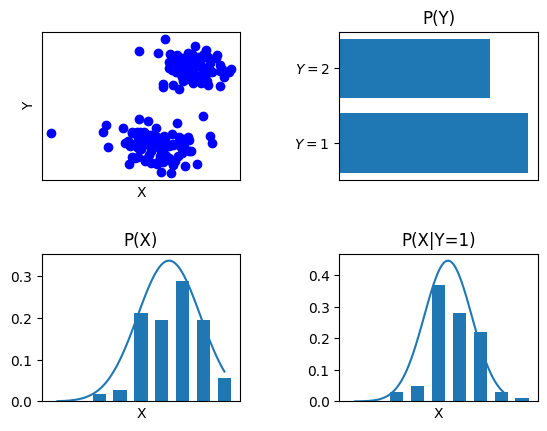

In [6]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(x1, y1, c = 'b')
axs[0,0].scatter(x2, y2, c = 'b')
axs[0,0].set_xticks([])
axs[0,0].set_xlabel('X')
axs[0,0].set_yticks([])
axs[0,0].set_ylabel('Y')

# P(Y)
axs[0,1].barh(["$Y=1$", "$Y=2$"], [P_y1, P_y2])
axs[0,1].set_title("P(Y)")
axs[0,1].set_xticks([])

# P(X)
ejeX = np.linspace(min(X),max(X),100)
distri = np.linspace(min(X), max(X), len(P_X))
axs[1,0].plot(ejeX, dist_normal((m1+m2)/2,v1+v2,ejeX))
axs[1,0].bar(distri, P_X, width=0.5)
axs[1,0].set_xticks([])
axs[1,0].set_xlabel('X')
axs[1,0].set_title("P(X)")


# P(X|Y=1)
ejeX2 = np.linspace(min(x1), max(x1),100)
axs[1,1].plot(ejeX2, dist_normal(m1,v1,ejeX2))
axs[1,1].bar(distri, P_XY1, width = 0.5)
axs[1,1].set_xticks([])
axs[1,1].set_xlabel('X')
axs[1,1].set_title("P(X|Y=1)")

plt.subplots_adjust(wspace=0.5, hspace=0.5)